# Linear Regression with Python (statsmodels and scikit-learn)

In [1]:
import pandas as pd
from IPython.display import Image  # Embed binary of images so that image file does not need to be provided

In [2]:
df = pd.read_csv('../data/wine.csv')

Data metadata:
- **Year**: harvest year
- **Price**: wine price in Italian Lira
- **WinterRain**: rainfall level during Winter season (ml)
- **AGST**: average growing season temperature (Celcius)
- **HarvestRate**: rainfall level during normal harvest season (ml)
- **Age**: age of the wine (years)
- **FrancePop**: France's population during that year

In [3]:
df.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


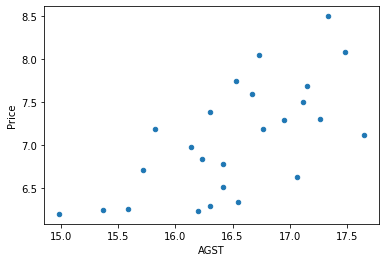

In [4]:
df.plot.scatter(x='AGST', y='Price')

From the plot above, we see there is some kind of upward rise or positive correlation between Price and AGST

# Linear Regression with Statsmodels Library

statsmodels has 2 API styles:


1. "Formula" or "R" API style
2. numpy array style

#### Using the "formula" or R-style api

In [5]:
import statsmodels.formula.api as smf  # Using formula API

In [6]:
model = smf.ols('Price ~ AGST', data=df).fit()

In [7]:
predictions = model.predict()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     17.71
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           0.000335
Time:                        20:56:02   Log-Likelihood:                -17.070
No. Observations:                  25   AIC:                             38.14
Df Residuals:                      23   BIC:                             40.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4178      2.494     -1.371      0.184      -8.576       1.740
AGST           0.6351      0.151      4.208      0.000       0.323       0.947
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.790
Skew:                           0.055   Prob(JB):                        0.674
Kurtosis:                       2.136   Cond. No.                         414.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Sum Squared Errors (or Sum Squared Residuals)

"residual" is just the difference between the actual and predicted values

In [9]:
model.ssr

5.73487514702012

Residuals:

In [10]:
model.resid

0     0.042043
1     0.829838
2     0.211694
3     0.156094
4    -0.231191
5     0.389917
6    -0.489591
7     0.903181
8     0.453724
9     0.148875
10   -0.238822
11   -0.089742
12    0.661857
13   -0.052115
14   -0.627266
15   -0.747149
16    0.421135
17   -0.037274
18    0.106853
19   -0.784503
20   -0.640176
21   -0.055087
22   -0.670553
23   -0.220404
24    0.558665
dtype: float64

#### Let's see how the model or prediction line fares

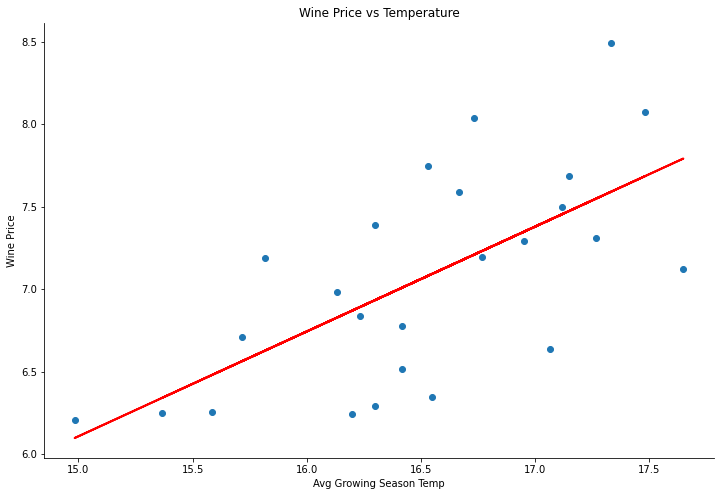

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot regression against actual data
plt.figure(figsize=(12, 8))
plt.plot(df['AGST'], df['Price'], 'o')                # scatter plot showing actual data
plt.plot(df['AGST'], predictions, 'r', linewidth=2)   # regression line
plt.xlabel('Avg Growing Season Temp')
plt.ylabel('Wine Price')
plt.title('Wine Price vs Temperature')
sns.despine()
plt.show()

### Using the numpy or matrix style api

I prefer the formula style api since when you use the numpy style api, you have to remember to use the add_constant() method

In [12]:
import statsmodels.api as sm

In [13]:
df.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


In [14]:
X = df[['AGST']]  # extra square bracket to make sure we create a 2-D data structure

In [15]:
y = df['Price']

In [16]:
# When using the non-formula API, need to add_constant() method
X = sm.add_constant(X)

In [17]:
model = sm.OLS(y, X).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     17.71
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           0.000335
Time:                        20:56:03   Log-Likelihood:                -17.070
No. Observations:                  25   AIC:                             38.14
Df Residuals:                      23   BIC:                             40.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4178      2.494     -1.371      0.184      -8.576       1.740
AGST           0.6351      0.151      4.208      0.000       0.323       0.947
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.790
Skew:                           0.055   Prob(JB):                        0.674
Kurtosis:                       2.136   Cond. No.                         414.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Residuals (actual y - predicted y)

In [19]:
model.resid

0     0.042043
1     0.829838
2     0.211694
3     0.156094
4    -0.231191
5     0.389917
6    -0.489591
7     0.903181
8     0.453724
9     0.148875
10   -0.238822
11   -0.089742
12    0.661857
13   -0.052115
14   -0.627266
15   -0.747149
16    0.421135
17   -0.037274
18    0.106853
19   -0.784503
20   -0.640176
21   -0.055087
22   -0.670553
23   -0.220404
24    0.558665
dtype: float64

#### SSE (Sum of Squared Error) or Sum of Squared Residuals:

In [20]:
model.ssr

5.73487514702012

### Multiple Linear Regression using Statsmodels with 2 Independent Variables

In [21]:
model2 = smf.ols('Price ~ AGST + HarvestRain', data=df).fit()

In [22]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     26.59
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           1.35e-06
Time:                        20:56:03   Log-Likelihood:                -8.8461
No. Observations:                  25   AIC:                             23.69
Df Residuals:                      22   BIC:                             27.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.2027      1.854     -1.188      0.248      -6.048       1.643
AGST            0.6026      0.111      5.415      0.000       0.372       0.833
HarvestRain    -0.0046      0.001     -4.525      0.000      -0.007      -0.002
==============================================================================
Omnibus:                        1.897   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                1.096
Skew:                          -0.511   Prob(JB):                        0.578
Kurtosis:                       3.080   Cond. No.                     4.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### SSE for this new model

In [23]:
model2.ssr

2.9703733401735453

### Multiple Linear Regression using Statsmodels with 5 Independent Variables

In [24]:
model3 = smf.ols('Price ~ AGST + HarvestRain + WinterRain + Age + FrancePop', data=df).fit()

In [25]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     18.47
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           1.04e-06
Time:                        20:56:04   Log-Likelihood:                -2.1043
No. Observations:                  25   AIC:                             16.21
Df Residuals:                      19   BIC:                             23.52
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4504     10.189     -0.044      0.965     -21.776      20.875
AGST            0.6012      0.103      5.836      0.000       0.386       0.817
HarvestRain    -0.0040      0.001     -4.523      0.000      -0.006      -0.002
WinterRain      0.0010      0.001      1.963      0.064   -6.89e-05       0.002
Age             0.0006      0.079      0.007      0.994      -0.165       0.166
FrancePop   -4.953e-05      0.000     -0.297      0.770      -0.000       0.000
==============================================================================
Omnibus:                        1.769   Durbin-Watson:                   2.792
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.026
Skew:                          -0.005   Prob(JB):                        0.599
Kurtosis:                       2.008   Cond. No.                     8.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
model3.ssr

1.7321127153437947

### Model Evaluation

**Q:** How do we know our model is improving?

**A:** The R squared value should be getting larger and the SSE (or SSR) should be getting smaller.

### Choosing Which Independent Variables to Keep

**Q:** How do we know which independent variables to keep?

**A:** Keep the independent variables with the largest absolute value in the t-statistic column or smallest value in the $P>|t|$ column.  They measure how likely the parameter value would be zero (higher absolute value of the t-statistic, the less likely; smaller the value of $P>|t|$, the less likely).  But due to multicollinearity, this is not a hard, fast rule.  Business domain knowledge should also be used.  Furthermore, ```coef``` column can be used to measure which independent variables have the stronger impact to the dependent variable.  But to compare the coeffienct variables, the values must be on the same scale.  If not, then you must use or calculate the *standardized* coefficient values which are calculated by subtracting the mean from each observed value and then dividing by the variable’s standard deviation.

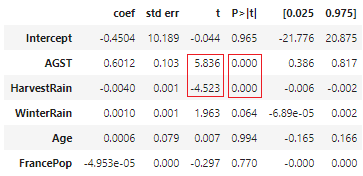

In [27]:
# markdown method for embeding image, but the image file must be made available
# ![](images/linear_regression_model_evaluation.png)
# Python method that actually embeds the binary of the image and so image does not need to be provided
Image("../images/linear_regression_model_evaluation.png")

From above, we see that AGST and HarvestRain are good candidates to keep.  WinterRain could also be kept.  However, based on business domain knowledge, we know that age is a factor in wine price.  So we will include age also.

In [28]:
model4 = smf.ols('Price ~ AGST + HarvestRain + WinterRain + Age', data=df).fit()

In [29]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     24.17
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           2.04e-07
Time:                        20:56:04   Log-Likelihood:                -2.1622
No. Observations:                  25   AIC:                             14.32
Df Residuals:                      20   BIC:                             20.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.4300      1.766     -1.942      0.066      -7.114       0.254
AGST            0.6072      0.099      6.152      0.000       0.401       0.813
HarvestRain    -0.0040      0.001     -4.652      0.000      -0.006      -0.002
WinterRain      0.0011      0.001      2.120      0.047    1.73e-05       0.002
Age             0.0239      0.008      2.956      0.008       0.007       0.041
==============================================================================
Omnibus:                        1.814   Durbin-Watson:                   2.797
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.041
Skew:                           0.034   Prob(JB):                        0.594
Kurtosis:                       2.003   Cond. No.                     1.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
model4.ssr

1.7401622013849856

### Multicollinearity

When 2 or more independent variables are highly correlated, then there exists multicollinearity.  This means we can possibly remove one independent variable at a time through trial and error to improve the model or if there is business domain knowledge to justify removing/keeping the independent variable.

Let's view correlations between combination of 2 variables

In [31]:
df.corr()  # tabular view

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.000000,-0.447768,0.016970,-0.246916,0.028009,-1.000000,0.994485
Price,-0.447768,1.000000,0.136651,0.659563,-0.563322,0.447768,-0.466862
WinterRain,0.016970,0.136651,1.000000,-0.321091,-0.275441,-0.016970,-0.001622
AGST,-0.246916,0.659563,-0.321091,1.000000,-0.064496,0.246916,-0.259162
HarvestRain,0.028009,-0.563322,-0.275441,-0.064496,1.000000,-0.028009,0.041264
Age,-1.000000,0.447768,-0.016970,0.246916,-0.028009,1.000000,-0.994485
FrancePop,0.994485,-0.466862,-0.001622,-0.259162,0.041264,-0.994485,1.000000


#### Let's make a heatmap to see the correlations easier

In [32]:
corr = df.corr()

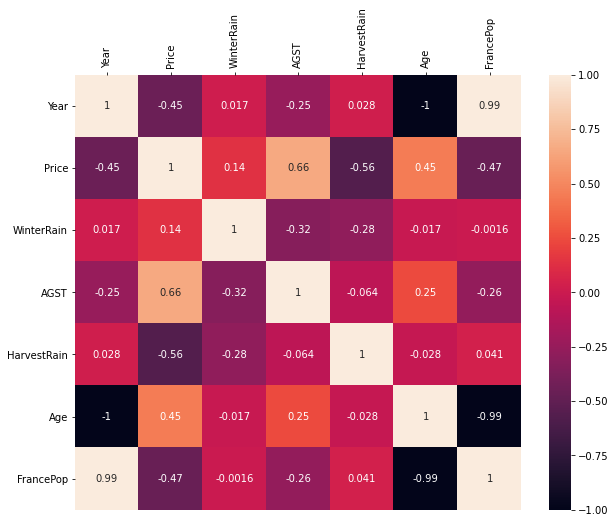

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
ax.xaxis.set_ticks_position('top')
sns.heatmap(corr, annot=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

From the heatmap above, we see that there is high correlation between ```Age``` and ```FrancePop```, both of which are independent variables.  Therefore, there exists multicollinearity.

#### With ```model4```, in deciding between keeping age or France's population, we decided to keep age.  But, let's see what happens if we don't keep both age and France's population.

In [34]:
model5 = smf.ols('Price ~ AGST + HarvestRain + WinterRain', data=df).fit()

In [35]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     21.42
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           1.36e-06
Time:                        20:56:05   Log-Likelihood:                -6.6922
No. Observations:                  25   AIC:                             21.38
Df Residuals:                      21   BIC:                             26.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.3016      2.037     -2.112      0.047      -8.537      -0.066
AGST            0.6810      0.112      6.097      0.000       0.449       0.913
HarvestRain    -0.0039      0.001     -3.953      0.001      -0.006      -0.002
WinterRain      0.0012      0.001      1.987      0.060   -5.47e-05       0.002
==============================================================================
Omnibus:                        0.621   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.419
Skew:                          -0.303   Prob(JB):                        0.811
Kurtosis:                       2.810   Cond. No.                     1.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model5.ssr

2.5002092357681827

When we excluded both age and France's population, our model performed worse (lower R2, higher SSE/SSR).  So the final model we would choose would be ```model4``` as it has highest R-squared value and lowest SSE.

#### Things to consider:

- We want higher correlation between dependent (price) variable and independent variables (that is a good thing!)
- If multicollinearity exists, we want to eliminate variables either through trial and error or through business domain knowledge and pick model with highest R-squared value/lowest SSE.  We want the simplest model or model with as fewest independent variables as possible.

### How to compare the relative impact that each independent variable has on the dependent variable?

We can use the coefficient values to compare, but if the variables' values are in a different scale, then it isn't an apples-to-apples comparison.  In order to fairly compare, we must calculate "standardized" coefficients.  To calculate the standardized coefficient, we just need to go back to our original data set, subtract the mean from each value, then divide by the standard deviation.  Then create our linear regression model using the standardized values in our data set.

Here's an [article](https://statisticsbyjim.com/regression/identifying-important-independent-variables/) explaining which metrics you should use to measure the relative impact that each independent variable has on the dependent variable.

In [37]:
df_standardized = (df - df.mean())/df.std()

In [38]:
df_standardized.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,-1.794075,0.657772,-0.039916,0.899270,0.153723,1.794075,-1.776368
1,-1.664069,1.494718,0.640469,0.331604,-0.921264,1.664069,-1.691391
2,-1.404059,0.951157,-0.780780,0.948574,-0.249397,1.404059,-1.494182
3,-1.144048,-0.127201,-1.400687,-0.556763,-0.518144,1.144048,-1.239250
4,-1.014042,-0.445957,-0.175993,-0.137158,0.516532,1.014042,-1.102410


In [39]:
model4_standardized = smf.ols('Price ~ AGST + HarvestRain + WinterRain + Age', data=df_standardized).fit()

In [40]:
model4_standardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     24.17
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           2.04e-07
Time:                        20:56:06   Log-Likelihood:                -12.919
No. Observations:                  25   AIC:                             35.84
Df Residuals:                      20   BIC:                             41.93
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.064e-16      0.091   9.99e-15      1.000      -0.189       0.189
AGST            0.6306      0.103      6.152      0.000       0.417       0.844
HarvestRain    -0.4545      0.098     -4.652      0.000      -0.658      -0.251
WinterRain      0.2188      0.103      2.120      0.047       0.004       0.434
Age             0.2830      0.096      2.956      0.008       0.083       0.483
==============================================================================
Omnibus:                        1.814   Durbin-Watson:                   2.797
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.041
Skew:                           0.034   Prob(JB):                        0.594
Kurtosis:                       2.003   Cond. No.                         1.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above summary output, the ```coef``` values are now standardized and so we can now compare the relative impact that each independent variable has on the dependent variable.  From the output above, we see that ```AGST``` has the most impact, followed by ```HarvestRain```, then followed by ```Age```, and then lastly, ```WinterRain```.

# Linear Regression with Scikit-Learn Library

[Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py) from their official documentation.  But why use scikit-learn for linear regression?  Isn't linear reqression part of traditional statistics, not machine learning?  Althought, linear regression is part of traditional statistics, it is still part of machine learning since linear regression models "learn" from data.  As such, scikit-learn invariably includes linear regression algorithm in its library.

For doing traditional statistics, recommend using statsmodels.  For machine learning model building, use scikit-learn.

scikit-learn's available metrics are more machine learning focused and tend to prefer mean squared errors for model evaluation.  Unlike statsmodels, scikit-learn does not have built-in functions for calculating residuals or SSE/SSR.

The general workflow when using scikit-learn is instantiate, fit(), and predict().

In [41]:
import sklearn.metrics as metrics

In [42]:
dir(metrics)

['ConfusionMatrixDisplay',
 'PrecisionRecallDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'davies_bouldin_score',
 'dcg_score',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'jaccard_score',
 'label_ranking_average_precision_score',
 'label_rank

From above, we see that scikit-learn has functions tailored toward machine learning-related metrics and fewer traditional statistics metrics.

## Single Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
X = df[['AGST']]  # extra square bracket to make sure we create a 2-D data structure
y = df['Price']

#### Instantiate an estimator object

In [45]:
model1_sk = LinearRegression()

#### Then fit the model

In [46]:
model1_sk.fit(X, y)

LinearRegression()

#### Y-Intercept

In [47]:
model1_sk.intercept_

-3.4177613134854585

#### Slope Parameter

In [48]:
model1_sk.coef_

array([0.63509431])

#### Prediction

In [49]:
pred = model1_sk.predict(X)

In [50]:
pred

array([7.45295742, 7.20946226, 7.47410606, 6.82840568, 7.0083914 ,
       7.68578299, 7.0083914 , 7.59051885, 6.9342759 , 6.56382539,
       7.54822157, 6.34154238, 7.0824434 , 6.89191511, 6.87076647,
       7.09304947, 7.16716498, 7.23067441, 6.09804722, 7.4212027 ,
       6.9342759 , 7.3470872 , 7.79165321, 6.47910381, 6.62733482])

#### R-Squared and Mean Square Error Metrics

In [51]:
print('Coefficient of determination: %.2f'
      % r2_score(y, pred))

Coefficient of determination: 0.44


In [52]:
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))

Mean squared error: 0.23


## Multiple Linear Regression

For multiple linear regression, you simply just add more independent variables/features to the X matrix.

Again, the general workflow in scikit-learn is to instantiate, then fit(), and then predict().

#### Let's include all independent variables

In [53]:
X = df[['AGST', 'HarvestRain', 'WinterRain', 'Age', 'FrancePop']]

In [54]:
model2_sk = LinearRegression()  # Instantiate

In [55]:
model2_sk.fit(X, y)             # Fit a model

LinearRegression()

In [56]:
model2_sk.intercept_

-0.4503988643947796

In [57]:
model2_sk.coef_

array([ 6.01223884e-01, -3.95812450e-03,  1.04250681e-03,  5.84748489e-04,
       -4.95273038e-05])

In [58]:
pred2 = model2_sk.predict(X)    # Predict

#### R-Squared and MSE Metrics

In [59]:
print('Coefficient of determination: %.2f'
      % r2_score(y, pred2))

Coefficient of determination: 0.83


In [60]:
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred2))

Mean squared error: 0.07


#### Let's include AGST, HarvestRain, WinterRain, and Age, but exclude FrancePop

In [61]:
X = df[['AGST', 'HarvestRain', 'WinterRain', 'Age']]

In [62]:
model3_sk = LinearRegression()

In [63]:
model3_sk.fit(X, y)

LinearRegression()

In [64]:
model3_sk.intercept_

-3.429980186928713

In [65]:
model3_sk.coef_

array([ 0.60720935, -0.00397153,  0.00107551,  0.02393083])

In [66]:
pred3 = model3_sk.predict(X)

In [67]:
print('Coefficient of determination: %.2f'
      % r2_score(y, pred3))

Coefficient of determination: 0.83


In [68]:
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred3))

Mean squared error: 0.07


We see that excluding ```FrancePop``` resulted in almost the exact same model performance as including ```FrancePop```.  Since it is better to have a smaller or simpler model, the model without ```FrancePop``` should be chosen.

### Making Predictions with Un-Seen Data (test data)

In [69]:
import pandas as pd
import numpy as np

In [70]:
df_test = pd.read_csv('../data/wine_test.csv')

In [71]:
df_test

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1979,6.9541,717,16.1667,122,4,54835.832
1,1980,6.4979,578,16.0000,74,3,55110.236


In [72]:
X = df_test[['WinterRain', 'AGST', 'HarvestRain', 'Age']]

In [73]:
pred = model4.predict(X)
pred

0    6.768925
1    6.684910
dtype: float64

#### Let's calculate the "out-of-sample" R-square

$R^{2} = 1-\frac{SSE}{SST}$

where:

$SSE=\sum_{i}\left(y_{i}-f_{i}\right)^{2}=\sum_{i} e_{i}^{2}$

$SST=\sum_{i}\left(y_{i}-\bar{y}\right)^{2}$

and $\boldsymbol{y}_{i}$ values are actual values and $\boldsymbol{f}_{i}$ values are predicted values and $\bar{y}$ is the mean of the training data.

In [74]:
SSE = sum((df_test['Price'] - pred) ** 2)

In [75]:
SST = sum((df_test['Price'] - df['Price'].mean()) ** 2)  # NOTE: You use the mean of the training data set, not test data set!

In [76]:
1 - (SSE/SST)

0.7944277602631964